In [1]:
from __future__ import print_function
import numpy as np
#np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.regularizers import l2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import os
batch_size = 32
nb_classes = 9
#image_size=(218,303)
#input_shape=(3,218,303)
image_size=(224,224)
input_shape=(3,224,224)
classes=["chicken","ostrich",'bluebird','finch','frog','salemander','cobra','bird','flamingo']

In [3]:
from PIL import Image
import random

def generate_image_array(ROOT):
    dir_path = os.getcwd()
    folders = os.listdir(ROOT)
    X = []
    Y = []
    i = 0
    print(folders)
    for folder in folders:
        if folder.startswith('.'):
            continue
        directory = dir_path + ROOT[1:] + folder + '/'
        label = np.zeros(len(classes))
        label[i] = 1
        i += 1
        for filename in os.listdir(directory):
            if filename == '.DS_Store':
                continue
            with Image.open(directory + filename) as im:
                img = im.resize(image_size, Image.ANTIALIAS)
                img_array = np.array(img).astype("float")
                if img_array.shape == (224, 224):  #gray image
                    temp = np.expand_dims(img_array, axis=0)
                    img_array = np.concatenate([temp, temp, temp], axis=0)
                    print("gray image", img_array.shape)
                else:
                    img_array = img_array.transpose(2, 0, 1)
                #img_array = np.expand_dims(img_array, axis=0)
                X.append(img_array)
                Y.append(label)
    return X, Y
    
    
ROOT = "./data/train/"
X_train, Y_train = generate_image_array(ROOT)
ROOT = "./data/val/"
X_val, Y_val = generate_image_array(ROOT)

['.DS_Store', 'n01514859', 'n01518878', 'n01580077', 'n01601694', 'n01644373', 'n01692333', 'n01748264', 'n01807496', 'n02007558']
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)
['.DS_Store', 'n01514859', 'n01518878', 'n01580077', 'n01601694', 'n01644373', 'n01692333', 'n01748264', 'n01807496', 'n02007558']
gray image (3, 224, 224)
gray image (3, 224, 224)
gray image (3, 224, 224)


In [4]:
index = random.sample(range(1, len(X_val)), batch_size*10)
# Given list1 and list2
list1_shuf = []
list2_shuf = []
index_shuf = range(len(Y_val))
random.shuffle(index_shuf)
for i in index_shuf:
    list1_shuf.append(X_val[i])
    list2_shuf.append(Y_val[i])
X_val = list1_shuf
Y_val = list2_shuf
for each in index:
    X_train.append(X_val.pop())
    Y_train.append(Y_val.pop())
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(10496, 3, 224, 224) (10496, 9)
(1008, 3, 224, 224) (1008, 9)


In [10]:
mean_image = np.mean(X_train, axis=0)
std_image = np.std(X_train, axis=0)
X_train = (X_train - mean_image)/std_image
X_val = (X_val - mean_image)/std_image

datagen = ImageDataGenerator(
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #samplewise_center=True,
    #samplewise_std_normalization=True,
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rescale=1./255,
    horizontal_flip=True)
datagen.fit(X_train)

In [11]:
#train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
#train_generator = train_datagen.flow_from_directory(
#        'data/train',
#        target_size=image_size,
#        batch_size=batch_size,
#        class_mode='categorical')
#test_datagen = ImageDataGenerator(rescale=1./255) #, featurewise_center=True)
#test_generator = train_datagen.flow_from_directory(
#        'data/val',
#        target_size=image_size,
#        batch_size=batch_size,
#        class_mode='categorical')

In [19]:
nb_epoch = 10
nb_filters=64
kernel_size=(3,3)
pool_size=(2,2)


In [35]:
from keras.layers import ZeroPadding2D

model = Sequential()
#model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
#                        border_mode='valid',
#                        input_shape=input_shape))
#model.add(Activation('relu'))
#model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
#model.add(Activation('relu'))
#model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(output_dim=128)) #, W_regularizer=l2(0.01)
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(output_dim=nb_classes))
#model.add(Activation('softmax'))

#VGG
model.add(ZeroPadding2D((1,1),input_shape=input_shape))
model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096/2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096/2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',
#              optimizer=sgd,
#              metrics=['accuracy'])

In [33]:
#history = model.fit_generator(train_generator,samples_per_epoch=640*2, nb_epoch=nb_epoch)
#score = model.evaluate_generator(train_generator, val_samples=10)

#mean_image = np.mean(X_train, axis=0)
#std_image = np.std(X_train, axis=0)
#print(std_image)
#X_val_temp = (X_val - mean_image)/std_image


history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    samples_per_epoch=640*2, nb_epoch=10, validation_data=(X_val, Y_val))



Epoch 1/10
1280/1280 [==============================] - 2951s - loss: 0.2544 - acc: 0.9219 - val_loss: 0.6386 - val_acc: 0.8194
Epoch 2/10
1280/1280 [==============================] - 2958s - loss: 0.2583 - acc: 0.9234 - val_loss: 0.6075 - val_acc: 0.8244
Epoch 3/10
1280/1280 [==============================] - 2917s - loss: 0.2537 - acc: 0.9203 - val_loss: 0.7068 - val_acc: 0.8065
Epoch 4/10
1280/1280 [==============================] - 2868s - loss: 0.2844 - acc: 0.9125 - val_loss: 0.7117 - val_acc: 0.8125
Epoch 5/10
1280/1280 [==============================] - 2844s - loss: 0.2359 - acc: 0.9242 - val_loss: 0.6855 - val_acc: 0.8085
Epoch 6/10
1280/1280 [==============================] - 2869s - loss: 0.2569 - acc: 0.9180 - val_loss: 0.6385 - val_acc: 0.8165
Epoch 7/10
1280/1280 [==============================] - 2841s - loss: 0.2721 - acc: 0.9125 - val_loss: 0.6906 - val_acc: 0.8075
Epoch 8/10
1280/1280 [==============================] - 2840s - loss: 0.2810 - acc: 0.9094 - val_loss: 0

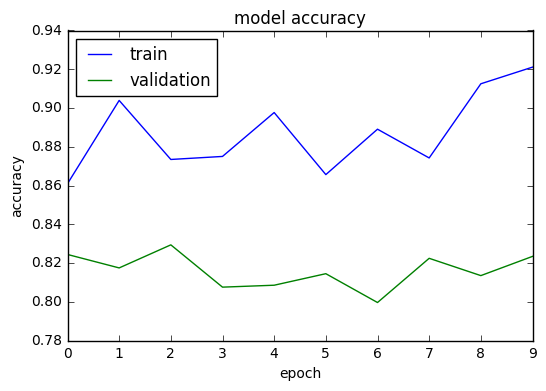

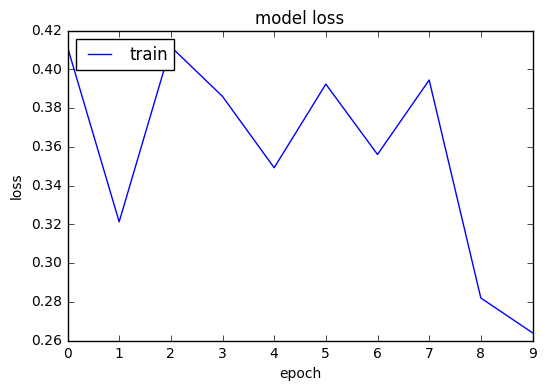

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

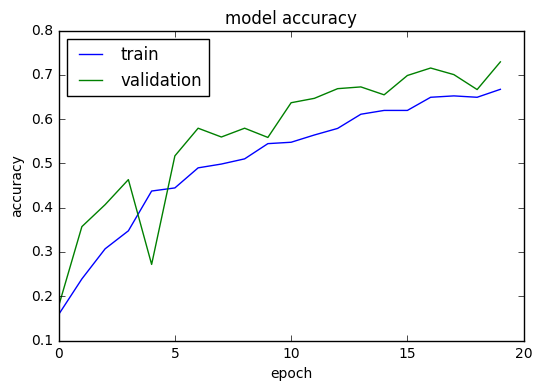

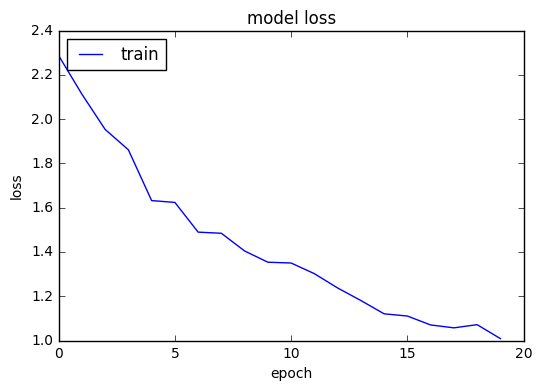

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

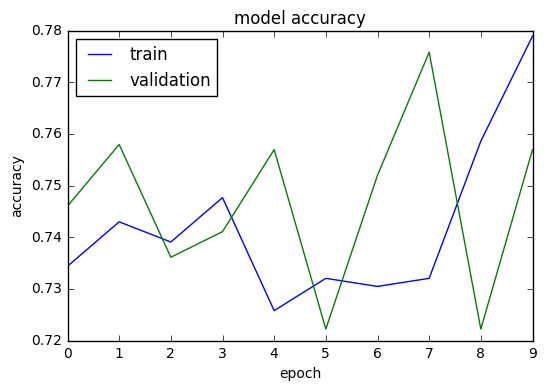

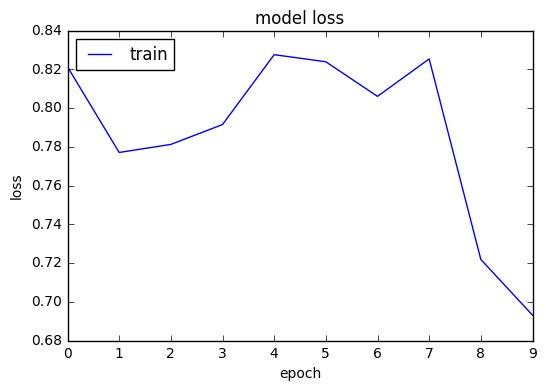

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

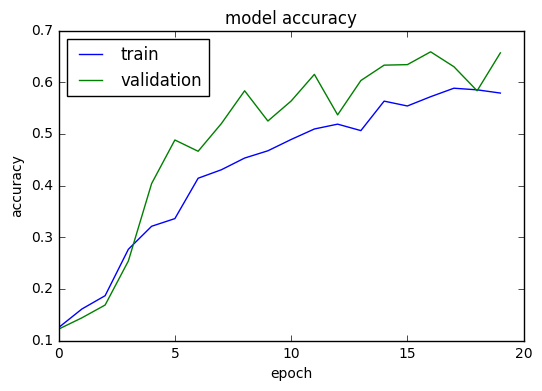

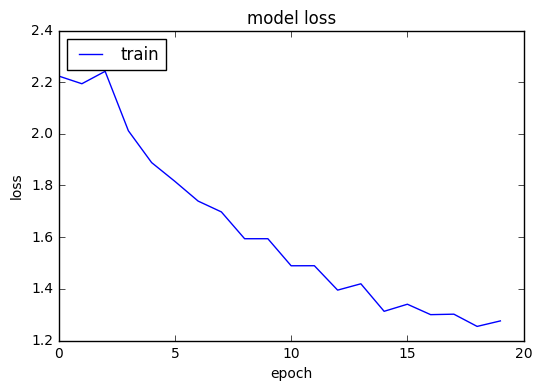

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

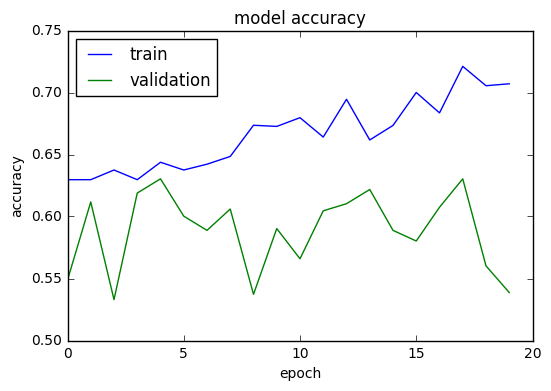

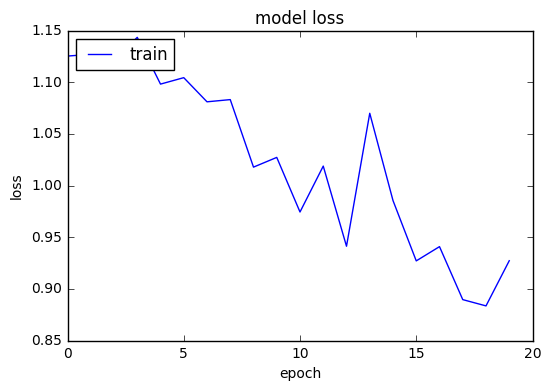

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

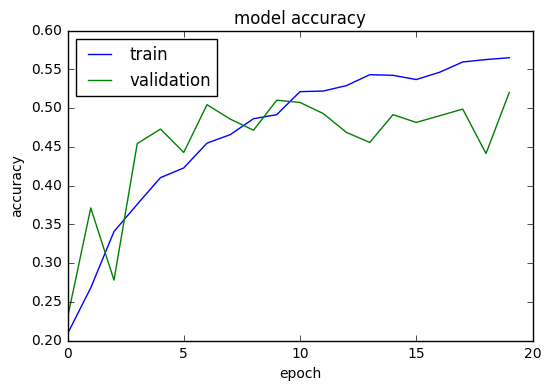

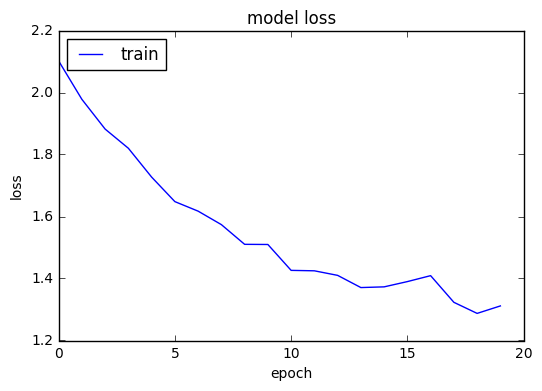

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
model.save('classify9_model_VGG_82percent.h5')

In [12]:
print(std_image.shape)

(3, 224, 224)
